In [46]:
import os
import numpy as np
from tensorflow.keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [47]:
train_dir = r'D:\Download\zyFile\Machine_Vision\MV_Seminar_Week 2\Machine_Vision_homework\MV_Seminar Week 5\data_mv\train'
test_dir = r'D:\Download\zyFile\Machine_Vision\MV_Seminar_Week 2\Machine_Vision_homework\MV_Seminar Week 5\data_mv\test'

In [48]:
# Load and preprocess the training data
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=4,
    class_mode='categorical',  # Assuming labels are provided as integers
    color_mode='rgb'  # Assuming images are grayscale
)

Found 48 images belonging to 3 classes.


In [49]:
# Load and preprocess the test data
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=4,
    class_mode='categorical',
    color_mode='rgb'
)

Found 24 images belonging to 3 classes.


In [50]:
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()

In [51]:
# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

In [52]:
# Add custom top layers for classification
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

In [53]:
# Create the new model
model = Model(inputs=base_model.input, outputs=output)

In [54]:
# Freeze base layers to prevent their weights from being updated
for layer in base_model.layers:
    layer.trainable = False

In [55]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [56]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
# Train the model
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 0s 407ms/step - loss: 1.0164 - accuracy: 0.3333 - val_loss: 2.8372 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 94ms/step - loss: 0.5469 - accuracy: 0.6667 - val_loss: 1.6193 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 95ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.7539 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 79ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.3316 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 31ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1530 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0800 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 15ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0465 - val_accuracy: 1.0000
Epoch 8/10
1/1

In [58]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

1/1 [==============================] - 0s 16ms/step - loss: 10.1265 - accuracy: 0.0000e+00
Test accuracy: 0.0


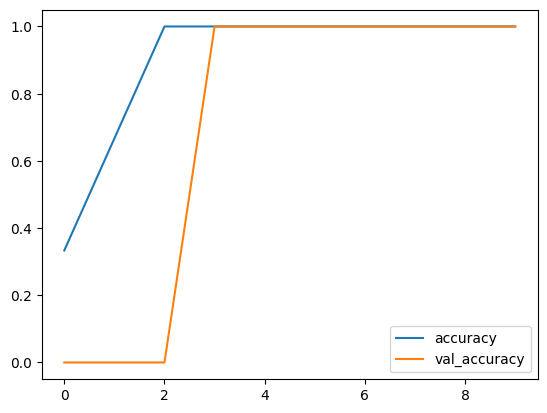

In [59]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

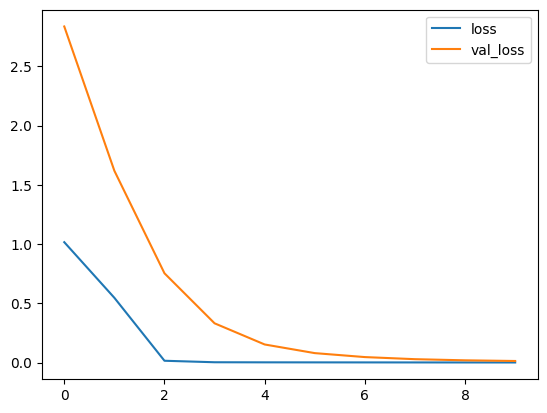

In [60]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()